3.Explain what a Kuwahara filter is, and apply it to the image using either Python or
MATLAB to demonstrate its effect.

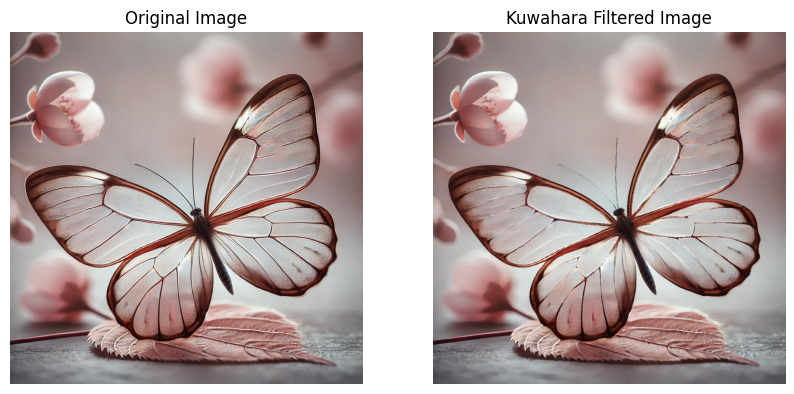

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def kuwahara_filter(img, kernel_size=5):
    pad_size = kernel_size // 2
    padded_img = np.pad(img, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='reflect')
    rows, cols, _ = img.shape
    output_img = np.zeros_like(img)

    for i in range(rows):
        for j in range(cols):
            for c in range(3):
                r, co = i + pad_size, j + pad_size
                region = padded_img[r - pad_size:r + pad_size + 1, co - pad_size:co + pad_size + 1, c]
                quadrants = [
                    region[0:pad_size + 1, 0:pad_size + 1],
                    region[0:pad_size + 1, pad_size:],
                    region[pad_size:, 0:pad_size + 1],
                    region[pad_size:, pad_size:]
                ]


                means = [np.mean(q) for q in quadrants]
                variances = [np.var(q) for q in quadrants]


                min_var_index = np.argmin(variances)
                output_img[i, j, c] = means[min_var_index]

    return np.clip(output_img, 0, 255).astype(np.uint8)


img_path = 'butterful.png'
img = cv2.imread(img_path)
if img is None:
    print(f"Error: Image not found or unable to load from '{img_path}'.")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    filtered_img = kuwahara_filter(img, kernel_size=5)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_img)
    plt.title('Kuwahara Filtered Image')
    plt.axis('off')

    plt.show()

**Kuwahara Filter for Image Processing**
The Kuwahara filter is a smoothing filter used in image processing that effectively reduces noise while preserving edges. In the context of the image you are working with, this filter helps retain the sharp details of the flower and surrounding elements, ensuring edges remain intact even after smoothing.

**Working:**
The Kuwahara filter processes each pixel by examining a neighborhood around it, which is divided into four regions. For each region, the filter calculates the mean and variance. The region with the smallest variance is then selected, and the pixel is replaced by the mean of this region. This method allows the Kuwahara filter to smooth areas without blurring edges, maintaining the distinct details in the flower petals and surrounding foliage.

**Key Features:**
Edge Preservation: Unlike traditional filters that may blur all details, the Kuwahara filter maintains the sharpness of edges. In your flower image, this means the edges of petals and leaves remain crisp while noise is reduced in less detailed areas.

**Noise Reduction:** This filter smooths out noisy areas, which is useful for images with color variations like your flower image. The Kuwahara filter reduces random noise without compromising the clarity of fine details.

**Non-linear Behavior:** The filter adapts to the image content by selecting the region with the least variance, rather than averaging the entire neighborhood. This feature makes it particularly suited for images with varied textures, as it treats edges and smooth areas differently.

**Applications to Your Image:**
 Applying the Kuwahara filter to your flower image can give it a "painterly" effect. It smooths the color transitions in the petals and background, while keeping the edges of the flower well-defined.

**Texture Smoothing:** For images with intricate textures, like the petals in colourful_flower.png, the Kuwahara filter effectively reduces noise in flat areas without blurring significant details.